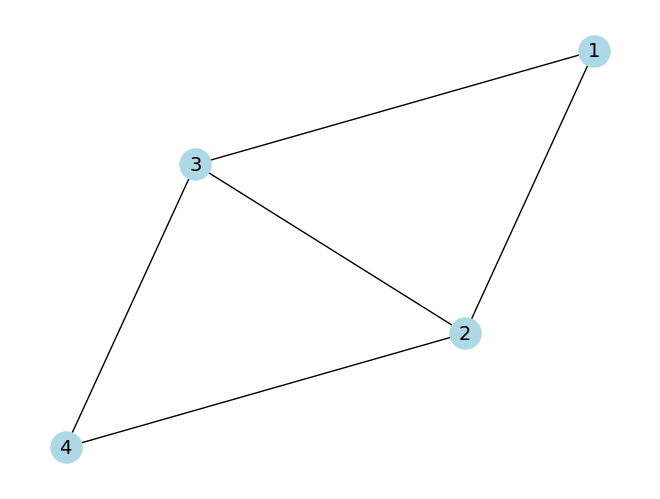

In [24]:
import networkx
import matplotlib.pyplot as plt

graph = networkx.Graph()
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
graph.add_edges_from(edges)

networkx.draw(graph, with_labels=True, node_color="lightblue", node_size=500, font_size=14)
plt.show()

In [25]:
hcube = networkx.hypercube_graph(3)

networkx.cycle_basis(hcube)


[[(1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1)],
 [(0, 1, 0), (0, 0, 0), (1, 0, 0), (1, 1, 0)],
 [(1, 0, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0)],
 [(0, 1, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0), (1, 1, 0), (1, 1, 1)],
 [(0, 1, 1), (0, 1, 0), (1, 1, 0), (1, 1, 1)]]

In [26]:
digraph = networkx.DiGraph()
directed_edges = [(u, v) for u, v in edges] + [(v, u) for u, v in edges]
digraph.add_edges_from(directed_edges)

list(networkx.simple_cycles(digraph))


[[1, 2, 3],
 [1, 2, 4, 3],
 [1, 2],
 [1, 3, 4, 2],
 [1, 3],
 [1, 3, 2],
 [2, 3, 4],
 [2, 3],
 [2, 4],
 [2, 4, 3],
 [3, 4]]

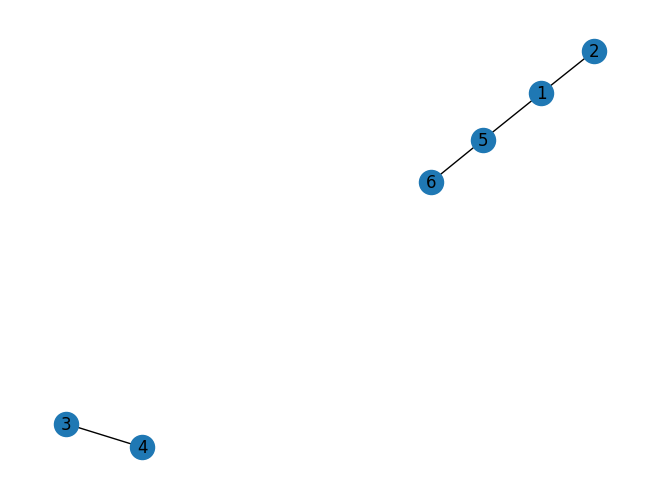

In [27]:
import random


graph = networkx.Graph()

node_count = 10
connect_prob = 0.1

for i in range(node_count):
	for j in range(i+1, node_count):
		if random.random() < connect_prob:
			graph.add_edge(i, j)

networkx.draw(graph, with_labels=True)

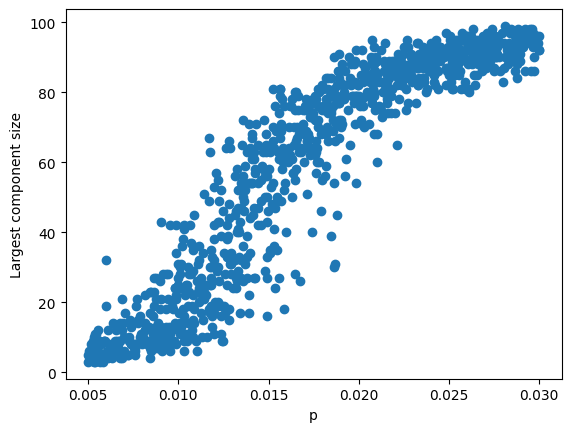

In [28]:
import numpy as np


attempts = 1000
nodes = 100
p_values = np.random.uniform(0.005, 0.03, attempts)
component_sizes = []


for p in p_values:
	graph = networkx.erdos_renyi_graph(nodes, p)
	component_sizes.append(len(max(networkx.connected_components(graph), key=len)))


plt.scatter(p_values, component_sizes)

plt.xlabel("p")
plt.ylabel("Largest component size")

plt.show()

In [29]:
from dotenv import load_dotenv
import os

# Load the .env file
load_dotenv()

# https://vkhost.github.io/
access_token = os.getenv("token")
user_id = os.getenv("user_id")

In [ ]:
import requests
import networkx


def get_friends_ids(user_id):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}&access_token={}&v=5.199' 
    # также вы можете добавить access_token в запрос, получив его через OAuth 2.0
    json_response = requests.get(friends_url.format(user_id, access_token)).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return list()
    return json_response[u'response']['items']


graph = {}
friend_ids = get_friends_ids(user_id)  # ваш user id, для которого вы хотите построить граф друзей.
for friend_id in friend_ids:
    print('Processing id: ', friend_id)
    graph[friend_id] = get_friends_ids(friend_id)

g = networkx.Graph(directed=False)
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

pos=networkx.spring_layout(g)
networkx.draw(g, pos, node_size=30, with_labels=False, width=0.2)


takiedela_ru
badcomedian
snob_project
romrs
lownet
sunnypyongyang
brown_room


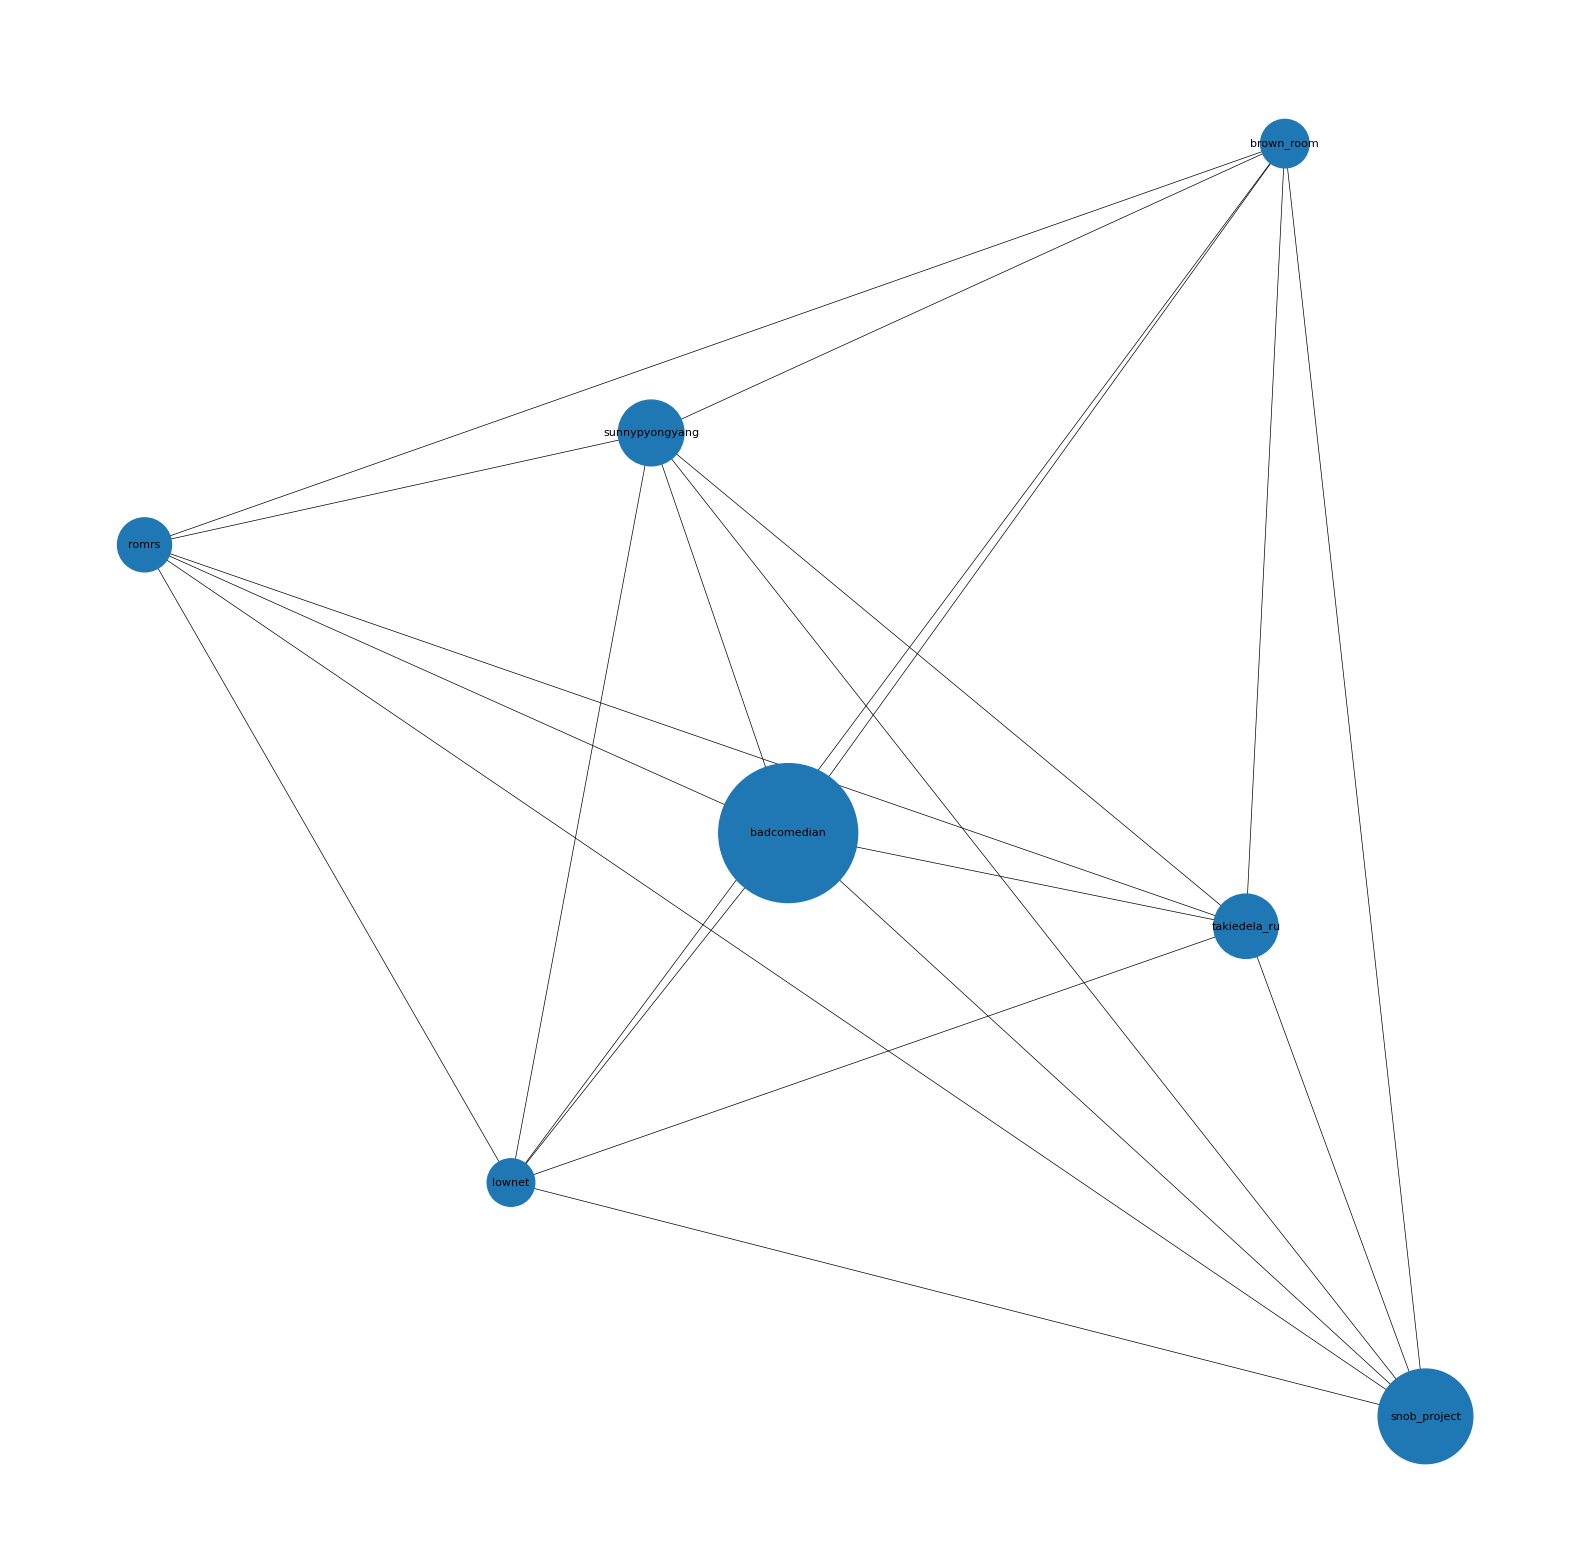

In [38]:

def getVKMembers(group_id, count=1000, offset=0):

	if count > 1000:
		raise Exception('Bad params: max of count = 1000')
	response = requests.get('https://api.vk.com/method/groups.getMembers?group_id={group_id}&count={count}&offset={offset}&access_token={access_token}&v=5.199'.format(group_id=group_id, count=count, offset=offset, access_token=access_token))
	
	if not response.ok:
		raise Exception('Bad response code')
	return response.json()

def allCountOffset(func, func_id):
	set_members_id = set()
	count_members = -1
	offset = 0
	while count_members != len(set_members_id): # posible endless loop for real vk api
		response = func(func_id, offset=offset)['response']
		if count_members != response['count']:
			count_members = response['count']


		new_members_id = response['items']
		offset += len(new_members_id)
		if set_members_id | set(new_members_id) == set_members_id != set(): # without new members
			print('WARNING: break loop', count_members, len(set_members_id))
			break
		set_members_id = set_members_id.union(new_members_id)

	return set_members_id

groups = [
	'https://vk.com/takiedela_ru',
	'https://vk.com/badcomedian',
	'https://vk.com/snob_project',
	'https://vk.com/romrs',
	'https://vk.com/lownet',
	'https://vk.com/sunnypyongyang',
	'https://vk.com/brown_room'
]

members = {}
for g in groups:
	name = g.split('https://vk.com/')[1]
	print(name)
	members[name] = allCountOffset(getVKMembers, name)
	
matrix = {}

for i in members:
	for j in members:
		if i != j:
			matrix[i+j] = len(members[i] & members[j]) * 1.0/ min(len(members[i]), len(members[j]))

max_matrix = max(matrix.values())
min_matrix = min(matrix.values())

for i in matrix:
	matrix[i] = (matrix[i] - min_matrix) / (max_matrix - min_matrix)
	
g = networkx.Graph(directed=False)
for i in members:
	for j in members:
		if i != j:
			g.add_edge(i, j, weight=matrix[i+j])
			
members_count = {x:len(members[x]) for x in members}

max_value = max(members_count.values()) * 1.0
size = []
max_size = 900
min_size = 100
for node in g.nodes():
	size.append(((members_count[node]/max_value)*max_size + min_size)*10)
	
import matplotlib.pyplot as plt
pos=networkx.spring_layout(g)
plt.figure(figsize=(20,20))
networkx.draw_networkx(g, pos, node_size=size, width=0.5, font_size=8)
plt.axis('off')
plt.show()